# Notes on 16-QAM Modulation

In 16-QAM, the constellation points are arranged on a grid with real and imaginary parts taking values from a set of amplitudes, often {−3,−1,+1,+3} for normalized power.

Let's take a step back and take a look at the big picture. As its name suggests, there are 16 constellation points in a 16-QAM modulation, in which 16 bit combinations (0000 to 1111) to be placed. Mathematically, there is 16! = 20922789888000 different combinations of placing these bit combinations to this constellation. It's only $\log_2(16)=4$ bits we are modulating, but just imagine how complex can this task be. Now imagine if we were dealing with 64-QAM or 256-QAM, the complexity probably more than the count of the stars in the observable universe.

We don't want to make our lives miserable, so we will be sticking with some methodologies for repeatability, optimization, and performance.

To start with, each constellation point represents 4 bits:

* The most significant bits (MSBs) correspond to the real part (in-phase).
* The least significant bits (LSBs) correspond to the imaginary part (quadrature).

In addition to this, we will be using Gray coding to map the bits into the constellation.
An alternative to Gray coding is "natural binary coding" but that has bad error correction performance.

For Gray coding:

* Real bits $b_1, b_2$ map to the in-phase component.
* Imaginary bits $b_3, b_4$ map to the quadrature component.

## 3.1. Constellation with 16-QAM

Each of the 16 constellation points corresponds to a unique 4-bit binary combination. The 4 bits are split as:

* 2 Most Significant Bits (MSBs): Determine the position along the I (in-phase) axis.
* 2 Least Significant Bits (LSBs): Determine the position along the Q (quadrature) axis.

#### Example Gray Coding for 16QAM
In a typical Gray-coded 16QAM, the bit mappings are as follows (I and Q axes shown separately):

| I Component (x-axis)    | MSBs (b3, b2) |
| --------                | -------       |
| -3                      | 00            |
| -1                      | 01            |
| 1                       | 11            |
| 3                       | 10            |

--------

| Q Component (x-axis)    | LSBs (b1, b0) |
| --------                | -------       |
| -3                      | 00            |
| -1                      | 01            |
| 1                       | 11            |
| 3                       | 10            |

Note that there are alternate gray coding schemes that can be achieved. Last time I calculated, there were 2 x 4 x 2 = 16 different ways. There could be more.
* 2 comes from row-major or column-major. (Our case: row-major)
* 4 comes from where you begin (i.e. plot "0000"): NW, NE, SW, SE. (Our case: SE)
* 2 comes from regular vs. inverse gray coding (Our case: regular)

#### Full Mapping
Each constellation point is formed by combining the I and Q values. Here’s the mapping of bits to constellation points:

| Bits(b3b2b1b0) | I(x) | Q(y) | 
| --------       | ---- | ---- | 
| 0000           | -3   | -3   | 
| 0001           | -3   | -1   | 
| 0011           | -3   | +1   | 
| 0010           | -3   | +3   | 
| --------       | ---- | ---- | 
| 0100           | -1   | -3   | 
| 0101           | -1   | -1   | 
| 0111           | -1   | +1   | 
| 0110           | -1   | +3   | 
| --------       | ---- | ---- | 
| 1100           | +1   | -3   | 
| 1101           | +1   | -1   | 
| 1111           | +1   | +1   | 
| 1110           | +1   | +3   | 
| --------       | ---- | ---- | 
| 1000           | +3   | -3   | 
| 1001           | +3   | -1   | 
| 1011           | +3   | +1   | 
| 1010           | +3   | +3   | 


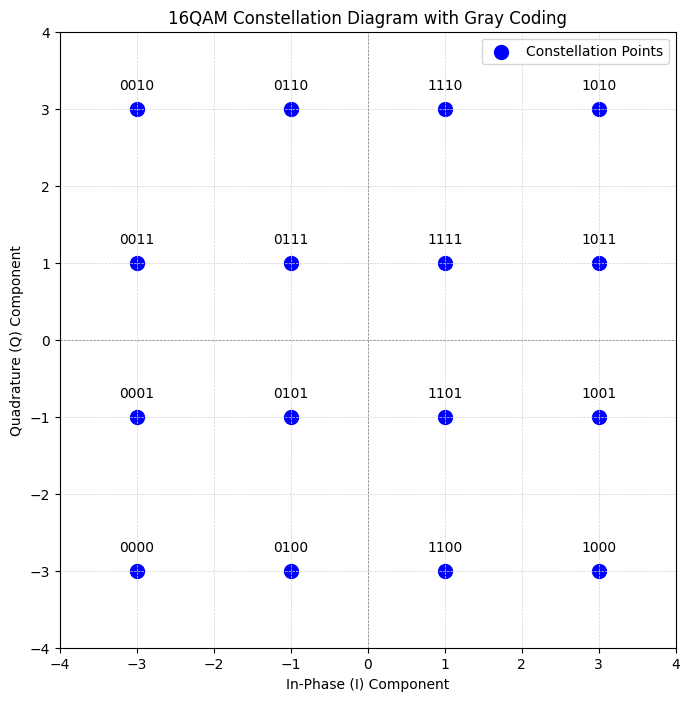

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the 16QAM constellation points and their corresponding bit mappings
constellation_points = {
    "0000": (-3, -3), "0001": (-3, -1), "0011": (-3, 1), "0010": (-3, 3),
    "0100": (-1, -3), "0101": (-1, -1), "0111": (-1, 1), "0110": (-1, 3),
    "1100": (1,  -3), "1101": ( 1, -1), "1111": ( 1, 1), "1110": ( 1, 3),
    "1000": (3,  -3), "1001": ( 3, -1), "1011": ( 3, 1), "1010": ( 3, 3)
}

# Extract x, y, and labels for plotting
x = [point[0] for point in constellation_points.values()]
y = [point[1] for point in constellation_points.values()]
labels = list(constellation_points.keys())

# Plot the constellation diagram without overlapping bit values on the points
plt.figure(figsize=(8, 8))
plt.scatter(x, y, color='blue', s=100, label="Constellation Points")
for i, label in enumerate(labels):
    # Adjust text placement to avoid overlap with the points
    plt.text(x[i], y[i] + 0.3, label, fontsize=10, ha='center', va='center')

# Label axes and set grid
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.title("16QAM Constellation Diagram with Gray Coding")
plt.xlabel("In-Phase (I) Component")
plt.ylabel("Quadrature (Q) Component")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()


In terms of a color-coded map for each bit, where 0 is red and 1 is blue, the regions for each coded bit can be represented as follows:

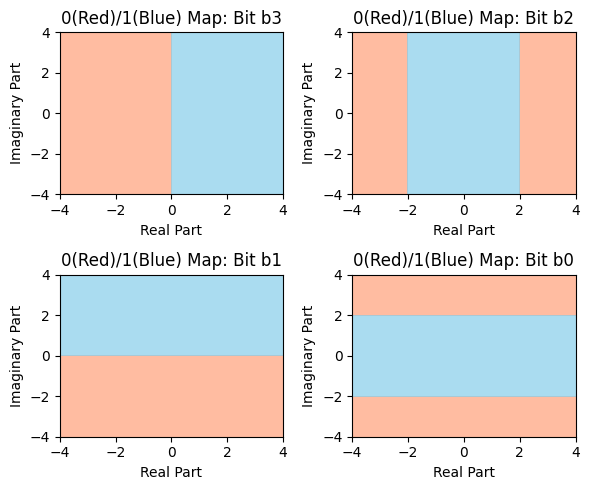

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the 16QAM constellation points and their corresponding bit mappings
constellation_points = {
    "0000": (-3, -3), "0001": (-3, -1), "0011": (-3, 1), "0010": (-3, 3),
    "0100": (-1, -3), "0101": (-1, -1), "0111": (-1, 1), "0110": (-1, 3),
    "1100": (1,  -3), "1101": ( 1, -1), "1111": ( 1, 1), "1110": ( 1, 3),
    "1000": (3,  -3), "1001": ( 3, -1), "1011": ( 3, 1), "1010": ( 3, 3)
}

# Define the grid range for the heat maps
x = np.linspace(-4, 4, 500)
y = np.linspace(-4, 4, 500)
X, Y = np.meshgrid(x, y)

# Function to calculate the bit region for a specific bit
def get_bit_region(constellation, bit_index):
    bit_values = np.zeros_like(X, dtype=int)
    for label, (cx, cy) in constellation.items():
        mask = (np.abs(X - cx) <= 1) & (np.abs(Y - cy) <= 1)
        bit_values[mask] = int(label[bit_index])
    return bit_values

# Generate heat maps for each bit
bit0_region = get_bit_region(constellation_points, 0)
bit1_region = get_bit_region(constellation_points, 1)
bit2_region = get_bit_region(constellation_points, 2)
bit3_region = get_bit_region(constellation_points, 3)

# Plot the constellation heat maps
fig, axs = plt.subplots(2, 2, figsize=(6, 5))

# Custom colormap
cmap = mcolors.ListedColormap(['#FFA07A', '#87CEEB'])
bounds = [-0.5, 0.5, 1.5]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Bit 1
c1 = axs[0, 0].contourf(X, Y, bit0_region, levels=1, cmap=cmap, alpha=0.7, norm=norm)
axs[0, 0].set_title("0(Red)/1(Blue) Map: Bit b3")
axs[0, 0].set_xlabel("Real Part")
axs[0, 0].set_ylabel("Imaginary Part")

# Bit 2
c2 = axs[0, 1].contourf(X, Y, bit1_region, levels=1, cmap=cmap, alpha=0.7, norm=norm)
axs[0, 1].set_title("0(Red)/1(Blue) Map: Bit b2")
axs[0, 1].set_xlabel("Real Part")
axs[0, 1].set_ylabel("Imaginary Part")

# Bit 3
c3 = axs[1, 0].contourf(X, Y, bit2_region, levels=1, cmap=cmap, alpha=0.7, norm=norm)
axs[1, 0].set_title("0(Red)/1(Blue) Map: Bit b1")
axs[1, 0].set_xlabel("Real Part")
axs[1, 0].set_ylabel("Imaginary Part")

# Bit 4
c4 = axs[1, 1].contourf(X, Y, bit3_region, levels=1, cmap=cmap, alpha=0.7, norm=norm)
axs[1, 1].set_title("0(Red)/1(Blue) Map: Bit b0")
axs[1, 1].set_xlabel("Real Part")
axs[1, 1].set_ylabel("Imaginary Part")

# Adjust layout
plt.tight_layout()
plt.show()


## 3.2. Modulation with 16-QAM

In 16QAM (16-Quadrature Amplitude Modulation), the bits are mapped onto a constellation that consists of 16 points arranged in a grid. The constellation points represent different combinations of 4 bits, with two bits mapping to the in-phase (I) component and two bits mapping to the quadrature (Q) component.

Here is a detailed explanation of how the mapping works:

1. Constellation Grid
The 16QAM constellation is typically arranged in a 4x4 grid:

* The x-axis represents the in-phase component (I).
* The y-axis represents the quadrature component (Q).


Each axis typically takes one of the values -3, -1, 1, 3 (after normalization for average power).



To modulate, you map 4 bits at a time to one constellation point:

$(2b_1 - 1)(2 - b_2) + j\cdot(2b_3 - 1)(2 - b_4)$

In [ ]:
import numpy as np
def modulate_16qam(bits):
    """
    Modulate bits to 16-QAM symbols with binary 1s mapping to negative values.

    Args:
        bits (np.ndarray): Array of bits (shape: multiple of 4).

    Returns:
        np.ndarray: Array of 16-QAM symbols (complex-valued).
    """
    bits = bits.reshape(-1, 4)  # Reshape into groups of 4 bits
    # Concatenate bit pairs for real and imaginary parts (e.g. [1,0] becomes "10")
    real_part_bin = bits[:, 0].astype(str) + bits[:, 1].astype(str)
    imag_part_bin = bits[:, 2].astype(str) + bits[:, 3].astype(str)
    # Convert binary strings to integers (e.g. "10" becomes 2)
    real_part_dec = np.array([int(b, 2) for b in real_part_bin])
    imag_part_dec = np.array([int(b, 2) for b in imag_part_bin])
    # Map decimal values to QAM levels (+3, +1, -1, -3)
    level_mapping = np.array([-3, -1, 3, 1])  # Adjusted mapping, carefully placed w.r.t gray code indexing.
    real_part = level_mapping[real_part_dec]
    imag_part = level_mapping[imag_part_dec]
    return real_part + 1j * imag_part

In [29]:
import numpy as np
print([1, 0, 1, 1], ": ", modulate_16qam(np.array([1, 0, 1, 1])))
print([0, 0, 0, 0], ": ", modulate_16qam(np.array([0, 0, 0, 0])))
print([0, 0, 0, 1], ": ", modulate_16qam(np.array([0, 0, 0, 1])))
print([1, 1, 1, 1], ": ", modulate_16qam(np.array([1, 1, 1, 1])))
print([1, 1, 0, 0], ": ", modulate_16qam(np.array([1, 1, 0, 0])))

# Reference:
# constellation_points = {
#     "0000": (-3, -3), "0001": (-3, -1), "0011": (-3, 1), "0010": (-3, 3),
#     "0100": (-1, -3), "0101": (-1, -1), "0111": (-1, 1), "0110": (-1, 3),
#     "1100": (1, -3),  "1101": (1, -1),  "1111": (1, 1),  "1110": (1, 3),
#     "1000": (3, -3),  "1001": (3, -1),  "1011": (3, 1),  "1010": (3, 3)
# }

[1, 0, 1, 1] :  [3.+1.j]
[0, 0, 0, 0] :  [-3.-3.j]
[0, 0, 0, 1] :  [-3.-1.j]
[1, 1, 1, 1] :  [1.+1.j]
[1, 1, 0, 0] :  [1.-3.j]


## 3.2. Soft Demodulation for 16-QAM

To compute LLRs for 16-QAM, we calculate the LLR for each bit separately, considering all possible constellation points for 
$b_k=0$ and $b_k=1$, where $k \in [1,4]$.

For bit $b_k$, the LLR is:

$$\text{LLR}_{b_k} = \ln \left( \frac{\sum_{s \in \mathcal{S}_{b_k = 0}} e^{-\frac{|y - s|^2}{2\sigma^2}}}{\sum_{s \in \mathcal{S}_{b_k = 1}} e^{-\frac{|y - s|^2}{2\sigma^2}}} \right)
$$

Here:
* $\mathcal{S}_{b_k=0}$ Subset of constellation points where $b_k=0$.
* $\mathcal{S}_{b_k=1}$ Subset of constellation points where $b_k=1$.

Expand for each bit:

$$\text{LLR}_{b_1} = \ln \left( \frac{e^{-\frac{|y - (-3 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3 +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 +3j)|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y - (+3 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 +3j)|^2}{2\sigma^2}}} \right)
$$

$$\text{LLR}_{b_2} = \ln \left( \frac{e^{-\frac{|y - (-3 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3 +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3 +3j)|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y - (-1 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1 +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1 +3j)|^2}{2\sigma^2}}} \right)
$$

$$\text{LLR}_{b_3} = \ln \left( \frac{e^{-\frac{|y - (-3, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, -1j)|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y - (-3, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3, +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, +1j)|^2}{2\sigma^2}}} \right)
$$


$$\text{LLR}_{b_4} = \ln \left( \frac{e^{-\frac{|y - (-3, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, -3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, +3j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, +3j)|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y - (-3, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, -1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-3, +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (-1, +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+1, +1j)|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - (+3, +1j)|^2}{2\sigma^2}}} \right)
$$

<!-- $$\text{LLR}_{b_1} = \ln \left( \frac{e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y - s|^2}{2\sigma^2}}} \right)
$$ -->


However, recall that for bits that are represented by real component, the imaginary part is redundant (and vice versa). So these LLR computations can be simplified as follows.

$$\text{LLR}_{b_1} = \ln \left( \frac{e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}}} \right)
$$

$$\text{LLR}_{b_2} = \ln \left( \frac{e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}}} \right)
$$

$$\text{LLR}_{b_3} = \ln \left( \frac{e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}}} \right)
$$


$$\text{LLR}_{b_4} = \ln \left( \frac{e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}}} \right)
$$

Which further simplifies to:

$$\text{LLR}_{b_1} = \ln \left( \frac{e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I +1|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_I -3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}}} \right)
$$

$$\text{LLR}_{b_2} = \ln \left( \frac{e^{-\frac{|y_I +3|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -3|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_I +1|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_I -1|^2}{2\sigma^2}}} \right)
$$

$$\text{LLR}_{b_3} = \ln \left( \frac{e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}}} \right)
$$


$$\text{LLR}_{b_4} = \ln \left( \frac{e^{-\frac{|y_Q +3j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -3j|^2}{2\sigma^2}} }
                                    { e^{-\frac{|y_Q +1j|^2}{2\sigma^2}} 
                                    + e^{-\frac{|y_Q -1j|^2}{2\sigma^2}}} \right)
$$

Before moving onto approximation techniques, let's visualize these expressions over the constellation plane.



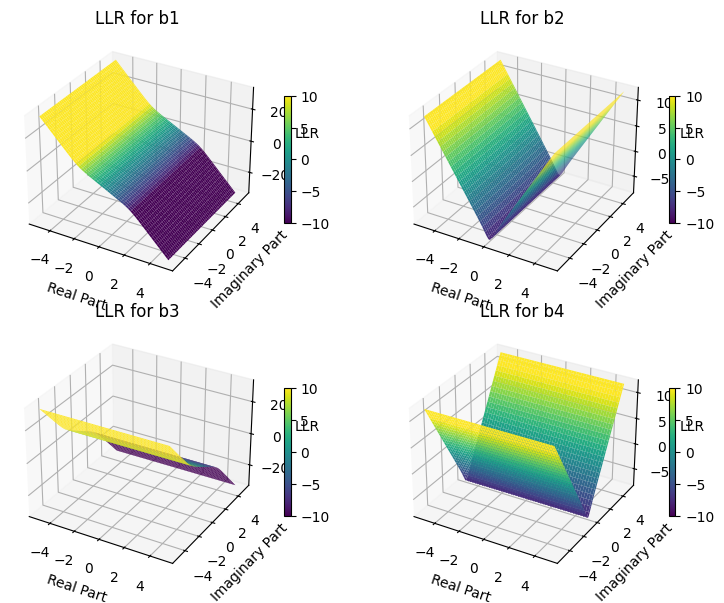

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters
sigma2 = 0.5  # Noise variance
y_real = np.linspace(-5, 5, 100)  # Real axis range
y_imag = np.linspace(-5, 5, 100)  # Imaginary axis range
Y_real, Y_imag = np.meshgrid(y_real, y_imag)  # Create 2D grid for constellation surface
Y = Y_real + 1j * Y_imag  # Combine into complex grid

# 16-QAM constellation points
constellation = np.array([-3-3j, -3-1j, -3+1j, -3+3j,
                          -1-3j, -1-1j, -1+1j, -1+3j,
                          +1-3j, +1-1j, +1+1j, +1+3j,
                          +3-3j, +3-1j, +3+1j, +3+3j])

# Exact LLR computation for b1
def exact_llr_b1(z, sigma2):
    num = np.exp(-(np.real(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) + 1)**2 / (2 * sigma2))
    den = np.exp(-(np.real(z) - 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) - 1)**2 / (2 * sigma2))
    return np.log(num / den)

def exact_llr_b2(z, sigma2):
    num = np.exp(-(np.real(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) - 3)**2 / (2 * sigma2))
    den = np.exp(-(np.real(z) - 1)**2 / (2 * sigma2)) + np.exp(-(np.real(z) + 1)**2 / (2 * sigma2))
    return np.log(num / den)

def exact_llr_b3(z, sigma2):
    num = np.exp(-(np.imag(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.imag(z) + 1)**2 / (2 * sigma2))
    den = np.exp(-(np.imag(z) - 3)**2 / (2 * sigma2)) + np.exp(-(np.imag(z) - 1)**2 / (2 * sigma2))
    return np.log(num / den)

def exact_llr_b4(z, sigma2):
    num = np.exp(-(np.imag(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.imag(z) - 3)**2 / (2 * sigma2))
    den = np.exp(-(np.imag(z) - 1)**2 / (2 * sigma2)) + np.exp(-(np.imag(z) + 1)**2 / (2 * sigma2))
    return np.log(num / den)

# Compute exact LLRs
llr_exact1 = exact_llr_b1(Y, sigma2)
llr_exact2 = exact_llr_b2(Y, sigma2)
llr_exact3 = exact_llr_b3(Y, sigma2)
llr_exact4 = exact_llr_b4(Y, sigma2)

# Create a custom colormap: Red near 0, Green at extremes
cmap1 = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["green", "red", "green"])
cmap2 = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["blue", "black", "blue"])


# Visualization of LLR surfaces
fig = plt.figure(figsize=(8, 6))

# Colormap for visualization
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=-10, vmax=10)

# LLR for b1
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_surface(Y_real, Y_imag, llr_exact1, cmap=cmap, norm=norm)
ax1.set_title("LLR for b1")
ax1.set_xlabel("Real Part")
ax1.set_ylabel("Imaginary Part")
ax1.set_zlabel("LLR")
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# LLR for b2
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf2 = ax2.plot_surface(Y_real, Y_imag, llr_exact2, cmap=cmap, norm=norm)
ax2.set_title("LLR for b2")
ax2.set_xlabel("Real Part")
ax2.set_ylabel("Imaginary Part")
ax2.set_zlabel("LLR")
fig.colorbar(surf2, ax=ax2, shrink=0.5)

# LLR for b3
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
surf3 = ax3.plot_surface(Y_real, Y_imag, llr_exact3, cmap=cmap, norm=norm)
ax3.set_title("LLR for b3")
ax3.set_xlabel("Real Part")
ax3.set_ylabel("Imaginary Part")
ax3.set_zlabel("LLR")
fig.colorbar(surf3, ax=ax3, shrink=0.5)

# LLR for b4
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
surf4 = ax4.plot_surface(Y_real, Y_imag, llr_exact4, cmap=cmap, norm=norm)
ax4.set_title("LLR for b4")
ax4.set_xlabel("Real Part")
ax4.set_ylabel("Imaginary Part")
ax4.set_zlabel("LLR")
fig.colorbar(surf4, ax=ax4, shrink=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

There are two different behaviors of LLRs arise with 16QAM. One is linear-ish shape and another in V-shape. 
* in v-shaped LLRs, how fair is it to be negative? It's like being a 1 has a curse, it can only take so many values.
* How do we approximate these LLRs effectively?

For b1 and b3, there seems to be three linear-ish regions.
For b2 and b4, there seems to be two linear-ish regions. 
These can be approximated easily...

Let's take a look at how different approximations take place. We will use b1 and b2 only, since b3 and b4 is 90 degree rotated version of the same behavior.

### Max-Log Approximation

To avoid the complexity of exact LLR computation, the max-log approximation is often used:

$\log(e^{-d1} + e^{-d2}) \approx -min(d1, d2)$

This simplifies the LLR comptutation:

$LLR_{b_i} \approx \frac{-min(d1, d2) +min(d3, d4)}{2 \sigma^2}$

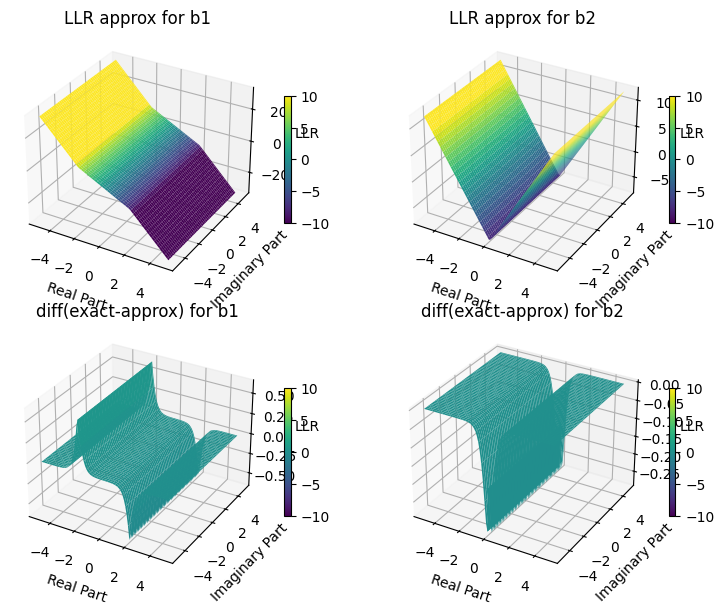

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters
sigma2 = 0.5  # Noise variance
y_real = np.linspace(-5, 5, 100)  # Real axis range
y_imag = np.linspace(-5, 5, 100)  # Imaginary axis range
Y_real, Y_imag = np.meshgrid(y_real, y_imag)  # Create 2D grid for constellation surface
Y = Y_real + 1j * Y_imag  # Combine into complex grid

# 16-QAM constellation points
constellation = np.array([-3-3j, -3-1j, -3+1j, -3+3j,
                          -1-3j, -1-1j, -1+1j, -1+3j,
                          +1-3j, +1-1j, +1+1j, +1+3j,
                          +3-3j, +3-1j, +3+1j, +3+3j])

# Exact LLR computation for b1
def exact_llr_b1(z, sigma2):
    num = np.exp(-(np.real(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) + 1)**2 / (2 * sigma2))
    den = np.exp(-(np.real(z) - 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) - 1)**2 / (2 * sigma2))
    return np.log(num / den)

def exact_llr_b2(z, sigma2):
    num = np.exp(-(np.real(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) - 3)**2 / (2 * sigma2))
    den = np.exp(-(np.real(z) - 1)**2 / (2 * sigma2)) + np.exp(-(np.real(z) + 1)**2 / (2 * sigma2))
    return np.log(num / den)

def approx_llr_b1(z, sigma2):
    num = -np.minimum((np.real(z) + 3)**2,(np.real(z) + 1)**2)
    den = -np.minimum((np.real(z) - 3)**2, (np.real(z) - 1)**2)
    return (num-den)/(2*sigma2)

def approx_llr_b2(z, sigma2):
    num = -np.minimum((np.real(z) + 3)**2,(np.real(z) - 3)**2)
    den = -np.minimum((np.real(z) + 1)**2, (np.real(z) - 1)**2)
    return (num-den)/(2*sigma2)

# Compute exact LLRs
llr_exact1 = exact_llr_b1(Y, sigma2)
llr_exact2 = exact_llr_b2(Y, sigma2)
llr_approx1 = approx_llr_b1(Y, sigma2)
llr_approx2 = approx_llr_b2(Y, sigma2)
llr_diff1 = llr_exact1 - llr_approx1
llr_diff2 = llr_exact2 - llr_approx2

# Create a custom colormap: Red near 0, Green at extremes
cmap1 = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["green", "red", "green"])
cmap2 = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["blue", "black", "blue"])


# Visualization of LLR surfaces
fig = plt.figure(figsize=(8, 6))

# Colormap for visualization
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=-10, vmax=10)

# LLR for b1
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf1 = ax1.plot_surface(Y_real, Y_imag, llr_approx1, cmap=cmap, norm=norm)
ax1.set_title("Max-Log approx for b1")
ax1.set_xlabel("Real Part")
ax1.set_ylabel("Imaginary Part")
ax1.set_zlabel("LLR")
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# LLR for b2
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
surf2 = ax2.plot_surface(Y_real, Y_imag, llr_approx2, cmap=cmap, norm=norm)
ax2.set_title("Max-Log approx for b2")
ax2.set_xlabel("Real Part")
ax2.set_ylabel("Imaginary Part")
ax2.set_zlabel("LLR")
fig.colorbar(surf2, ax=ax2, shrink=0.5)

# LLR for b3
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
surf3 = ax3.plot_surface(Y_real, Y_imag, llr_diff1, cmap=cmap, norm=norm)
ax3.set_title("diff(exact-approx) for b1")
ax3.set_xlabel("Real Part")
ax3.set_ylabel("Imaginary Part")
ax3.set_zlabel("LLR")
fig.colorbar(surf3, ax=ax3, shrink=0.5)

# LLR for b4
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
surf4 = ax4.plot_surface(Y_real, Y_imag, llr_diff2, cmap=cmap, norm=norm)
ax4.set_title("diff(exact-approx) for b2")
ax4.set_xlabel("Real Part")
ax4.set_ylabel("Imaginary Part")
ax4.set_zlabel("LLR")
fig.colorbar(surf4, ax=ax4, shrink=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### Log-Sum-Exp Trick

* log_sum_exp_trick adjusts each distance by subtracting the minimum distance (min_dist) before applying the exponential, avoiding numerical overflow or underflow.

* It is not really a simplification in calculation. In some sense, it is more complex than the usual computation.

The exact LLR for a bit \( b_i \) is:
$$
\text{LLR}(b_i) = \log\left(\frac{\sum_{s \in S_0} \exp\left(-\frac{|z - s|^2}{2\sigma^2}\right)}{\sum_{s \in S_1} \exp\left(-\frac{|z - s|^2}{2\sigma^2}\right)}\right)
$$

Using the Log-Sum-Exp Trick, the numerator becomes:
$$
-\frac{\min_{s \in S_0} |z - s|^2}{2\sigma^2} + \log\left(\sum_{s \in S_0} \exp\left(-\frac{|z - s|^2 - \min_{s \in S_0} |z - s|^2}{2\sigma^2}\right)\right)
$$

For the denominator:
$$
-\frac{\min_{s \in S_1} |z - s|^2}{2\sigma^2} + \log\left(\sum_{s \in S_1} \exp\left(-\frac{|z - s|^2 - \min_{s \in S_1} |z - s|^2}{2\sigma^2}\right)\right)
$$

### Piece-wise Approximation

* In this section, using intuition, I developed a piece-wise approximation for LLRs in efforts to simplify the process further.
* Also I want to check if it is a better approximation than the max-log approximation.


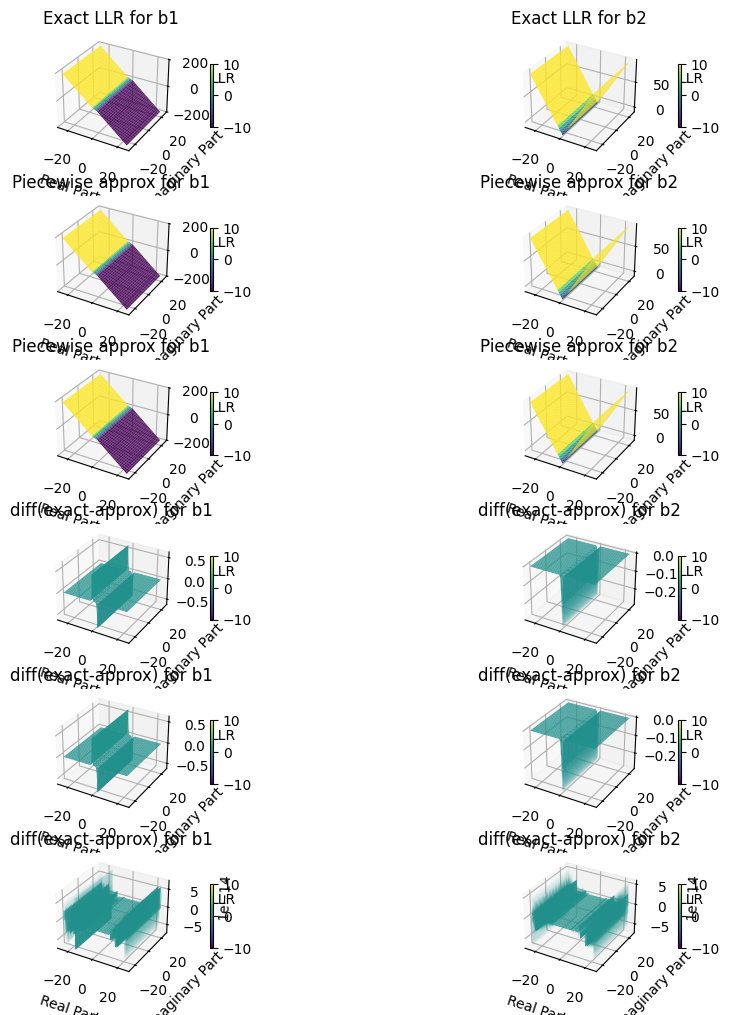

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Parameters
sigma2 = 0.5  # Noise variance
y_real = np.linspace(-25, 25, 500)  # Real axis range
y_imag = np.linspace(-25, 25, 500)  # Imaginary axis range
Y_real, Y_imag = np.meshgrid(y_real, y_imag)  # Create 2D grid for constellation surface
Y = Y_real + 1j * Y_imag  # Combine into complex grid

# 16-QAM constellation points
constellation = np.array([-3-3j, -3-1j, -3+1j, -3+3j,
                          -1-3j, -1-1j, -1+1j, -1+3j,
                          +1-3j, +1-1j, +1+1j, +1+3j,
                          +3-3j, +3-1j, +3+1j, +3+3j])

# Exact LLR computation for b1
def exact_llr_b1(z, sigma2):
    num = np.exp(-(np.real(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) + 1)**2 / (2 * sigma2))
    den = np.exp(-(np.real(z) - 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) - 1)**2 / (2 * sigma2))
    return np.log(num / den)

def exact_llr_b2(z, sigma2):
    num = np.exp(-(np.real(z) + 3)**2 / (2 * sigma2)) + np.exp(-(np.real(z) - 3)**2 / (2 * sigma2))
    den = np.exp(-(np.real(z) - 1)**2 / (2 * sigma2)) + np.exp(-(np.real(z) + 1)**2 / (2 * sigma2))
    return np.log(num / den)

def approx_llr_b1(z, sigma2):
    num = -np.minimum((np.real(z) + 3)**2,(np.real(z) + 1)**2)
    den = -np.minimum((np.real(z) - 3)**2, (np.real(z) - 1)**2)
    return (num-den)/(2*sigma2)

def approx_llr_b2(z, sigma2):
    num = -np.minimum((np.real(z) + 3)**2,(np.real(z) - 3)**2)
    den = -np.minimum((np.real(z) + 1)**2, (np.real(z) - 1)**2)
    return (num-den)/(2*sigma2)

def piecewise_llr_b1(y, sigma2):
    """
    Piecewise approximation for LLR of b1 in 16-QAM, handling multi-dimensional inputs.

    Args:
        y (np.ndarray): Received symbols (real-valued or complex-valued grid).
        sigma2 (float): Noise variance.

    Returns:
        np.ndarray: Approximate LLRs for b1.
    """
    # Extract the real part of y (important for b1)
    real_y = np.real(y)
    
    # Identify regions
    middle = (np.abs(real_y) <= 2)  # Middle region: -2 <= y <= 2
    lower = (real_y < -2)          # Lower region: y < -2
    upper = (real_y > 2)           # Upper region: y > 2

    # Initialize LLR array with same shape as real_y
    llr = np.zeros_like(real_y)

    # Middle region approximation
    llr[middle] = -2 * real_y[middle] / sigma2
    # Lower region approximation
    llr[lower] = -2 * (2*real_y[lower] + 2) / sigma2
    # Upper region approximation
    llr[upper] = -2 * (2*real_y[upper] - 2) / sigma2

    return llr

def piecewise_llr_b2(y, sigma2):
    """
    Piecewise approximation for LLR of b1 in 16-QAM, handling multi-dimensional inputs.

    Args:
        y (np.ndarray): Received symbols (real-valued or complex-valued grid).
        sigma2 (float): Noise variance.

    Returns:
        np.ndarray: Approximate LLRs for b1.
    """
    # Extract the real part of y (important for b1)
    real_y = np.real(y)
    
    # Identify regions
    lower = (real_y < 0)          # Lower region: y < -2
    upper = (real_y >= 0)         # Upper region: y > 2

    # Initialize LLR array with same shape as real_y
    llr = np.zeros_like(real_y)

    # Lower region approximation
    llr[lower] = -2 * (1*real_y[lower] + 2) / sigma2
    # Upper region approximation
    llr[upper] = +2 * (1*real_y[upper] - 2) / sigma2

    return llr



# Compute exact LLRs
llr_exact1 = exact_llr_b1(Y, sigma2)
llr_exact2 = exact_llr_b2(Y, sigma2)
llr_approx_pw_1 = piecewise_llr_b1(Y, sigma2)
llr_approx_pw_2 = piecewise_llr_b2(Y, sigma2)
llr_diff_pw_1 = llr_exact1 - llr_approx_pw_1
llr_diff_pw_2 = llr_exact2 - llr_approx_pw_2
llr_approx_ml_1 = approx_llr_b1(Y, sigma2)
llr_approx_ml_2 = approx_llr_b2(Y, sigma2)
llr_diff_ml_1 = llr_exact1 - llr_approx_ml_1
llr_diff_ml_2 = llr_exact2 - llr_approx_ml_2
llr_diff_1 = llr_diff_pw_1 - llr_diff_ml_1
llr_diff_2 = llr_diff_pw_2 - llr_diff_ml_2

# Create a custom colormap: Red near 0, Green at extremes
cmap1 = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["green", "red", "green"])
cmap2 = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["blue", "black", "blue"])


# Visualization of LLR surfaces
fig = plt.figure(figsize=(12, 10))

# Colormap for visualization
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=-10, vmax=10)

# LLR for b1
ax1 = fig.add_subplot(6, 2, 1, projection='3d')
surf1 = ax1.plot_surface(Y_real, Y_imag, llr_exact1, cmap=cmap, norm=norm)
ax1.set_title("Exact LLR for b1")
ax1.set_xlabel("Real Part")
ax1.set_ylabel("Imaginary Part")
ax1.set_zlabel("LLR")
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# LLR for b2
ax2 = fig.add_subplot(6, 2, 2, projection='3d')
surf2 = ax2.plot_surface(Y_real, Y_imag, llr_exact2, cmap=cmap, norm=norm)
ax2.set_title("Exact LLR for b2")
ax2.set_xlabel("Real Part")
ax2.set_ylabel("Imaginary Part")
ax2.set_zlabel("LLR")
fig.colorbar(surf2, ax=ax2, shrink=0.5)

# LLR for b1
ax1 = fig.add_subplot(6, 2, 3, projection='3d')
surf1 = ax1.plot_surface(Y_real, Y_imag, llr_approx_ml_1, cmap=cmap, norm=norm)
ax1.set_title("Piecewise approx for b1")
ax1.set_xlabel("Real Part")
ax1.set_ylabel("Imaginary Part")
ax1.set_zlabel("LLR")
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# LLR for b2
ax2 = fig.add_subplot(6, 2, 4, projection='3d')
surf2 = ax2.plot_surface(Y_real, Y_imag, llr_approx_ml_2, cmap=cmap, norm=norm)
ax2.set_title("Piecewise approx for b2")
ax2.set_xlabel("Real Part")
ax2.set_ylabel("Imaginary Part")
ax2.set_zlabel("LLR")
fig.colorbar(surf2, ax=ax2, shrink=0.5)


# LLR for b1
ax1 = fig.add_subplot(6, 2, 5, projection='3d')
surf1 = ax1.plot_surface(Y_real, Y_imag, llr_approx_pw_1, cmap=cmap, norm=norm)
ax1.set_title("Piecewise approx for b1")
ax1.set_xlabel("Real Part")
ax1.set_ylabel("Imaginary Part")
ax1.set_zlabel("LLR")
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# LLR for b2
ax2 = fig.add_subplot(6, 2, 6, projection='3d')
surf2 = ax2.plot_surface(Y_real, Y_imag, llr_approx_pw_2, cmap=cmap, norm=norm)
ax2.set_title("Piecewise approx for b2")
ax2.set_xlabel("Real Part")
ax2.set_ylabel("Imaginary Part")
ax2.set_zlabel("LLR")
fig.colorbar(surf2, ax=ax2, shrink=0.5)


# LLR for b3
ax3 = fig.add_subplot(6, 2, 7, projection='3d')
surf3 = ax3.plot_surface(Y_real, Y_imag, llr_diff_ml_1, cmap=cmap, norm=norm)
ax3.set_title("diff(exact-approx) for b1")
ax3.set_xlabel("Real Part")
ax3.set_ylabel("Imaginary Part")
ax3.set_zlabel("LLR")
fig.colorbar(surf3, ax=ax3, shrink=0.5)

# LLR for b4
ax4 = fig.add_subplot(6, 2, 8, projection='3d')
surf4 = ax4.plot_surface(Y_real, Y_imag, llr_diff_ml_2, cmap=cmap, norm=norm)
ax4.set_title("diff(exact-approx) for b2")
ax4.set_xlabel("Real Part")
ax4.set_ylabel("Imaginary Part")
ax4.set_zlabel("LLR")
fig.colorbar(surf4, ax=ax4, shrink=0.5)


# LLR for b3
ax3 = fig.add_subplot(6, 2, 9, projection='3d')
surf3 = ax3.plot_surface(Y_real, Y_imag, llr_diff_pw_1, cmap=cmap, norm=norm)
ax3.set_title("diff(exact-approx) for b1")
ax3.set_xlabel("Real Part")
ax3.set_ylabel("Imaginary Part")
ax3.set_zlabel("LLR")
fig.colorbar(surf3, ax=ax3, shrink=0.5)

# LLR for b4
ax4 = fig.add_subplot(6, 2, 10, projection='3d')
surf4 = ax4.plot_surface(Y_real, Y_imag, llr_diff_pw_2, cmap=cmap, norm=norm)
ax4.set_title("diff(exact-approx) for b2")
ax4.set_xlabel("Real Part")
ax4.set_ylabel("Imaginary Part")
ax4.set_zlabel("LLR")
fig.colorbar(surf4, ax=ax4, shrink=0.5)


# LLR for b3
ax3 = fig.add_subplot(6, 2, 11, projection='3d')
surf3 = ax3.plot_surface(Y_real, Y_imag, llr_diff_1, cmap=cmap, norm=norm)
ax3.set_title("diff(exact-approx) for b1")
ax3.set_xlabel("Real Part")
ax3.set_ylabel("Imaginary Part")
ax3.set_zlabel("LLR")
fig.colorbar(surf3, ax=ax3, shrink=0.5)

# LLR for b4
ax4 = fig.add_subplot(6, 2, 12, projection='3d')
surf4 = ax4.plot_surface(Y_real, Y_imag, llr_diff_2, cmap=cmap, norm=norm)
ax4.set_title("diff(exact-approx) for b2")
ax4.set_xlabel("Real Part")
ax4.set_ylabel("Imaginary Part")
ax4.set_zlabel("LLR")
fig.colorbar(surf4, ax=ax4, shrink=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

Piecewise approximation is an excellent approximation and it is much less costly. However there seems to be a couple of patents about it, making it difficult to deploy.